In [1]:
import pandas as pd

# Load the dataset
file_path = "movie_metadata.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [2]:
# Selecting only numeric columns
numerical_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numerical_cols]

# Fill missing values with median
df_numeric.fillna(df_numeric.median(), inplace=True)


/var/folders/pv/byryysg97h9dgc4sfsdqc_tm0000gn/T/ipykernel_19538/782234810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.fillna(df_numeric.median(), inplace=True)


In [3]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Convert back to DataFrame for better readability
df_scaled_df = pd.DataFrame(df_scaled, columns=numerical_cols)


In [4]:
from sklearn.decomposition import PCA

# Apply PCA with 2 components
pca_2 = PCA(n_components=2)
df_pca_2 = pca_2.fit_transform(df_scaled)

# Apply PCA with 3 components
pca_3 = PCA(n_components=3)
df_pca_3 = pca_3.fit_transform(df_scaled)

# Variance explained by first 2 and 3 components
explained_variance_2 = sum(pca_2.explained_variance_ratio_) * 100
explained_variance_3 = sum(pca_3.explained_variance_ratio_) * 100

print(f"Variance retained in 2 components: {explained_variance_2:.2f}%")
print(f"Variance retained in 3 components: {explained_variance_3:.2f}%")


Variance retained in 2 components: 40.83%
Variance retained in 3 components: 49.46%


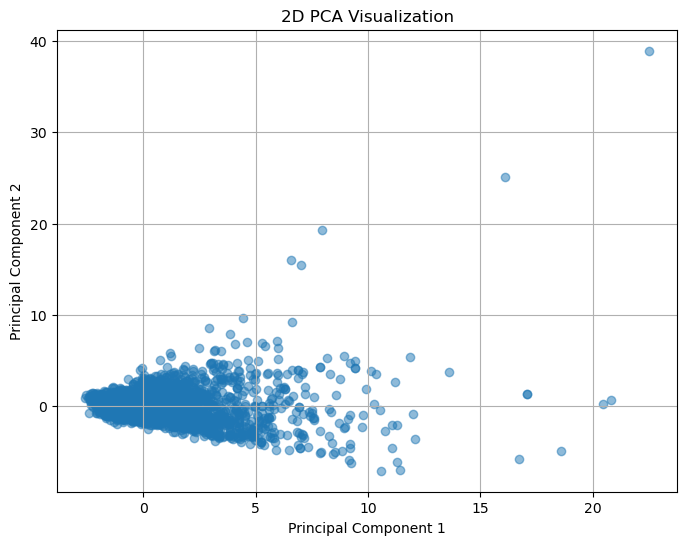

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2[:, 0], df_pca_2[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization")
plt.grid(True)
plt.show()


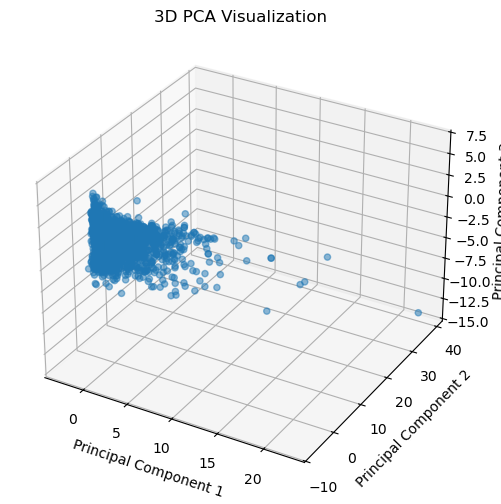

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3[:, 0], df_pca_3[:, 1], df_pca_3[:, 2], alpha=0.5)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Visualization")
plt.show()


Number of components needed for 95% variance retention: 13


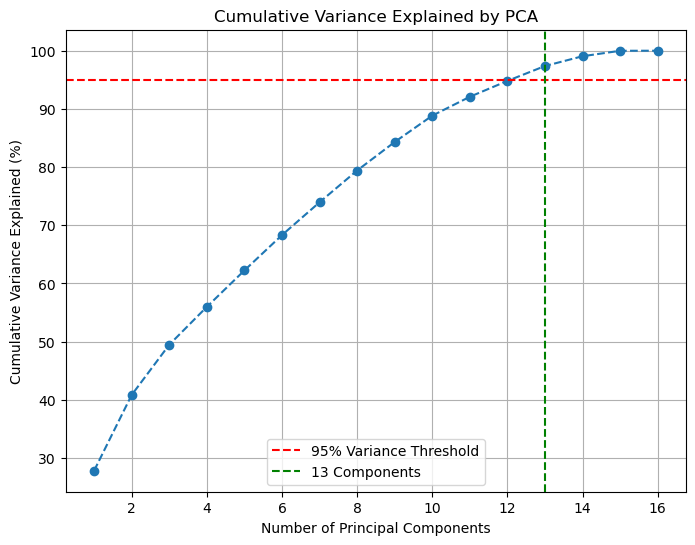

In [7]:
import numpy as np

# Apply PCA to find how many components retain 95% variance
pca_full = PCA()
pca_full.fit(df_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components needed for 95% variance retention
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed for 95% variance retention: {num_components_95}")

# Plot cumulative variance explained
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', linestyle='--')
plt.axhline(y=95, color='r', linestyle='--', label="95% Variance Threshold")
plt.axvline(x=num_components_95, color='g', linestyle='--', label=f"{num_components_95} Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained (%)")
plt.title("Cumulative Variance Explained by PCA")
plt.legend()
plt.grid(True)
plt.show()
